In [1]:
import os
import cv2
import torch
import numpy as np
import rosbag
import matplotlib.pyplot as plt
import custom_utils.data_conversion as data_conversion

DATAFILE = "/scratchdata/stationary"
FRAME_INDEX = 0

# Open bag file
bag_file_path = os.path.join(DATAFILE, "raw.bag")
bag = rosbag.Bag(bag_file_path)

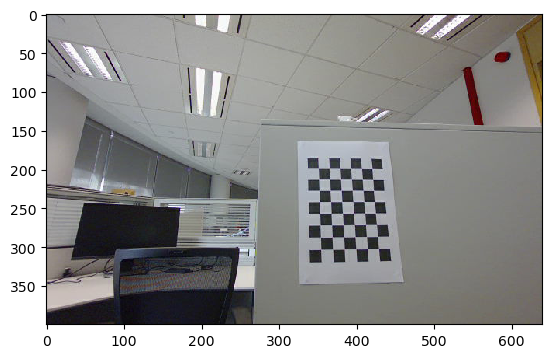

In [2]:
wait = 0
for topic, msg, t in bag.read_messages(topics=["/camera/color/image_raw"]):
    if wait == FRAME_INDEX:
        img = data_conversion.topic_to_image(msg)
        break
    wait += 1

plt.imshow(img)
plt.imsave(os.path.join(DATAFILE, "color.png"), img)

In [3]:
for topic, msg, t in bag.read_messages(topics=["/camera/color/camera_info"]):
    print(msg)
    D = np.array(msg.D)
    K = np.array(msg.K).reshape((3, 3))
    P = np.array(msg.P).reshape((3, 4))
    R = np.array(msg.R).reshape((3, 3))
    height = msg.height
    width = msg.width
    distortion_model = msg.distortion_model
    break

header: 
  seq: 738
  stamp: 
    secs: 1724060625
    nsecs: 704971008
  frame_id: "camera_color_optical_frame"
height: 400
width: 640
distortion_model: "rational_polynomial"
D: [-1.0684188604354858, 0.5052042007446289, 0.0006109976093284786, -0.0002675213327165693, -0.056596025824546814, -1.049520492553711, 0.4790358245372772, -0.04655176028609276]
K: [305.6186218261719, 0.0, 314.30413818359375, 0.0, 305.7062072753906, 197.7598876953125, 0.0, 0.0, 1.0]
R: [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
P: [305.6186218261719, 0.0, 314.30413818359375, 0.0, 0.0, 305.7062072753906, 197.7598876953125, 0.0, 0.0, 0.0, 1.0, 0.0]
binning_x: 0
binning_y: 0
roi: 
  x_offset: 0
  y_offset: 0
  height: 0
  width: 0
  do_rectify: False


48


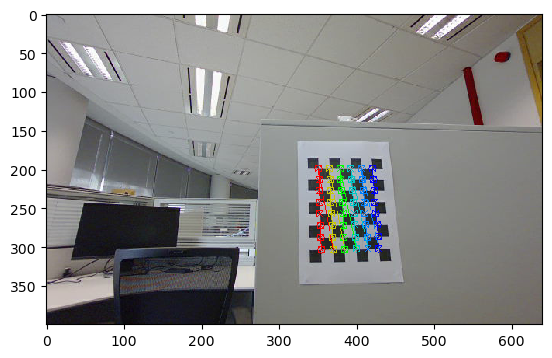

In [15]:
#Estimate distance of checkerboard
# Load camera matrix
camera_matrix = K
distortion_coefficients = D

ret, corners = cv2.findChessboardCorners(
    img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH)
if ret:
    print(len(corners))
    fnl = cv2.drawChessboardCorners(np.float32(img/255.0), CHECKERBOARD, corners, ret)
    plt.imshow(fnl)
else:
    print("No Checkerboard Found")
    plt.imshow(res)
